## 1. Getting the system ready


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind, f_oneway, chi2_contingency

## Loading the data

In [2]:
df = pd.read_csv("../data/Student_performance_data .csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 2. Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


There is 2392 non null records and all the data types are integers excpet StudyTimeWeekly, GPA, and GradeClass

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


### 2.1 Checking for null values

In [5]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### 2.2 Checking for duplicate values

In [6]:
df.duplicated().sum()

np.int64(0)

# 3. Exploratory Data analysis

## *i*. Univariate Analysis

In this section, we examine the distribution of each variable individually to understand its nature and range.

- Categorical features (e.g., Gender, Parental Education, Activities) are plotted using countplots.
- Numerical features (e.g., GPA, Study Time, Absences) are analyzed using histograms with KDE curves.
- The target variable, `GradeClass`, shows a fairly balanced distribution, with most students in classes B and C.

### Numerical features

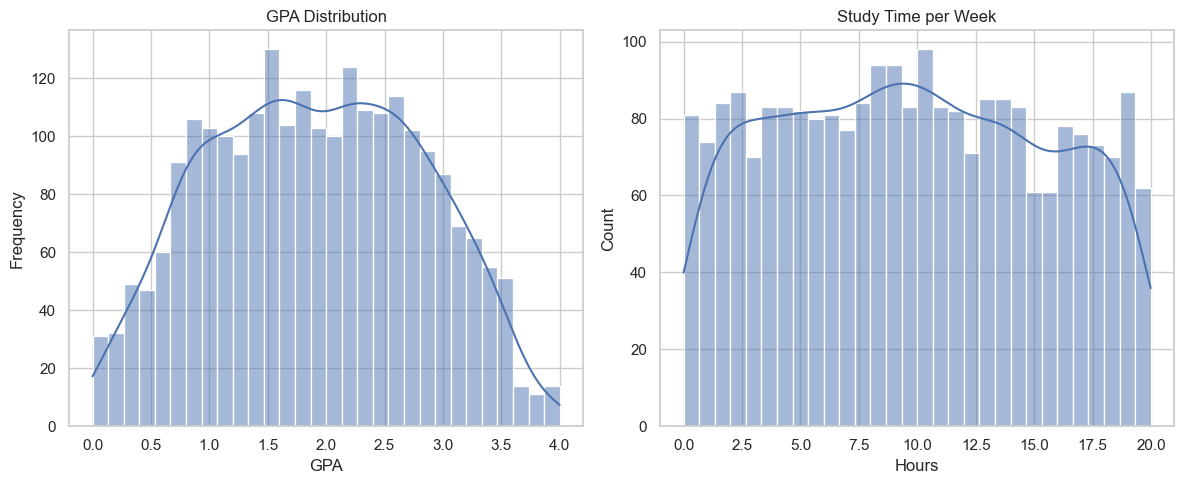

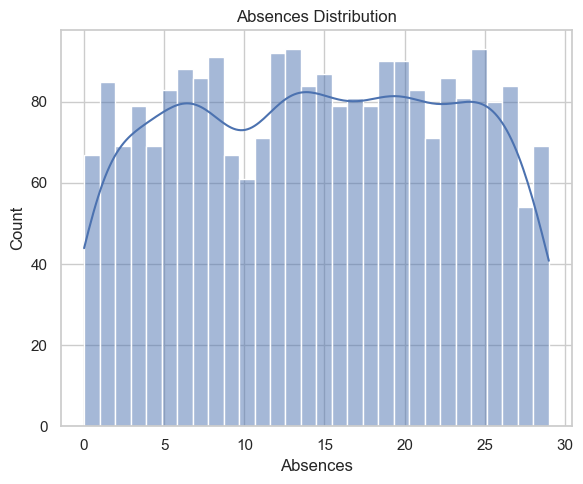

In [7]:

sns.set_theme(style="whitegrid")

# GPA distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(ax=axes[0], data=df, x='GPA', bins=30, kde=True)
axes[0].set_title("GPA Distribution")
axes[0].set_xlabel("GPA")
axes[0].set_ylabel("Frequency")

# Study Time distribution
sns.histplot(ax=axes[1], data=df, x='StudyTimeWeekly', bins=30, kde=True)
axes[1].set_title("Study Time per Week")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Absences distribution
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Absences', bins=30, kde=True)
plt.title("Absences Distribution")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Categorical features

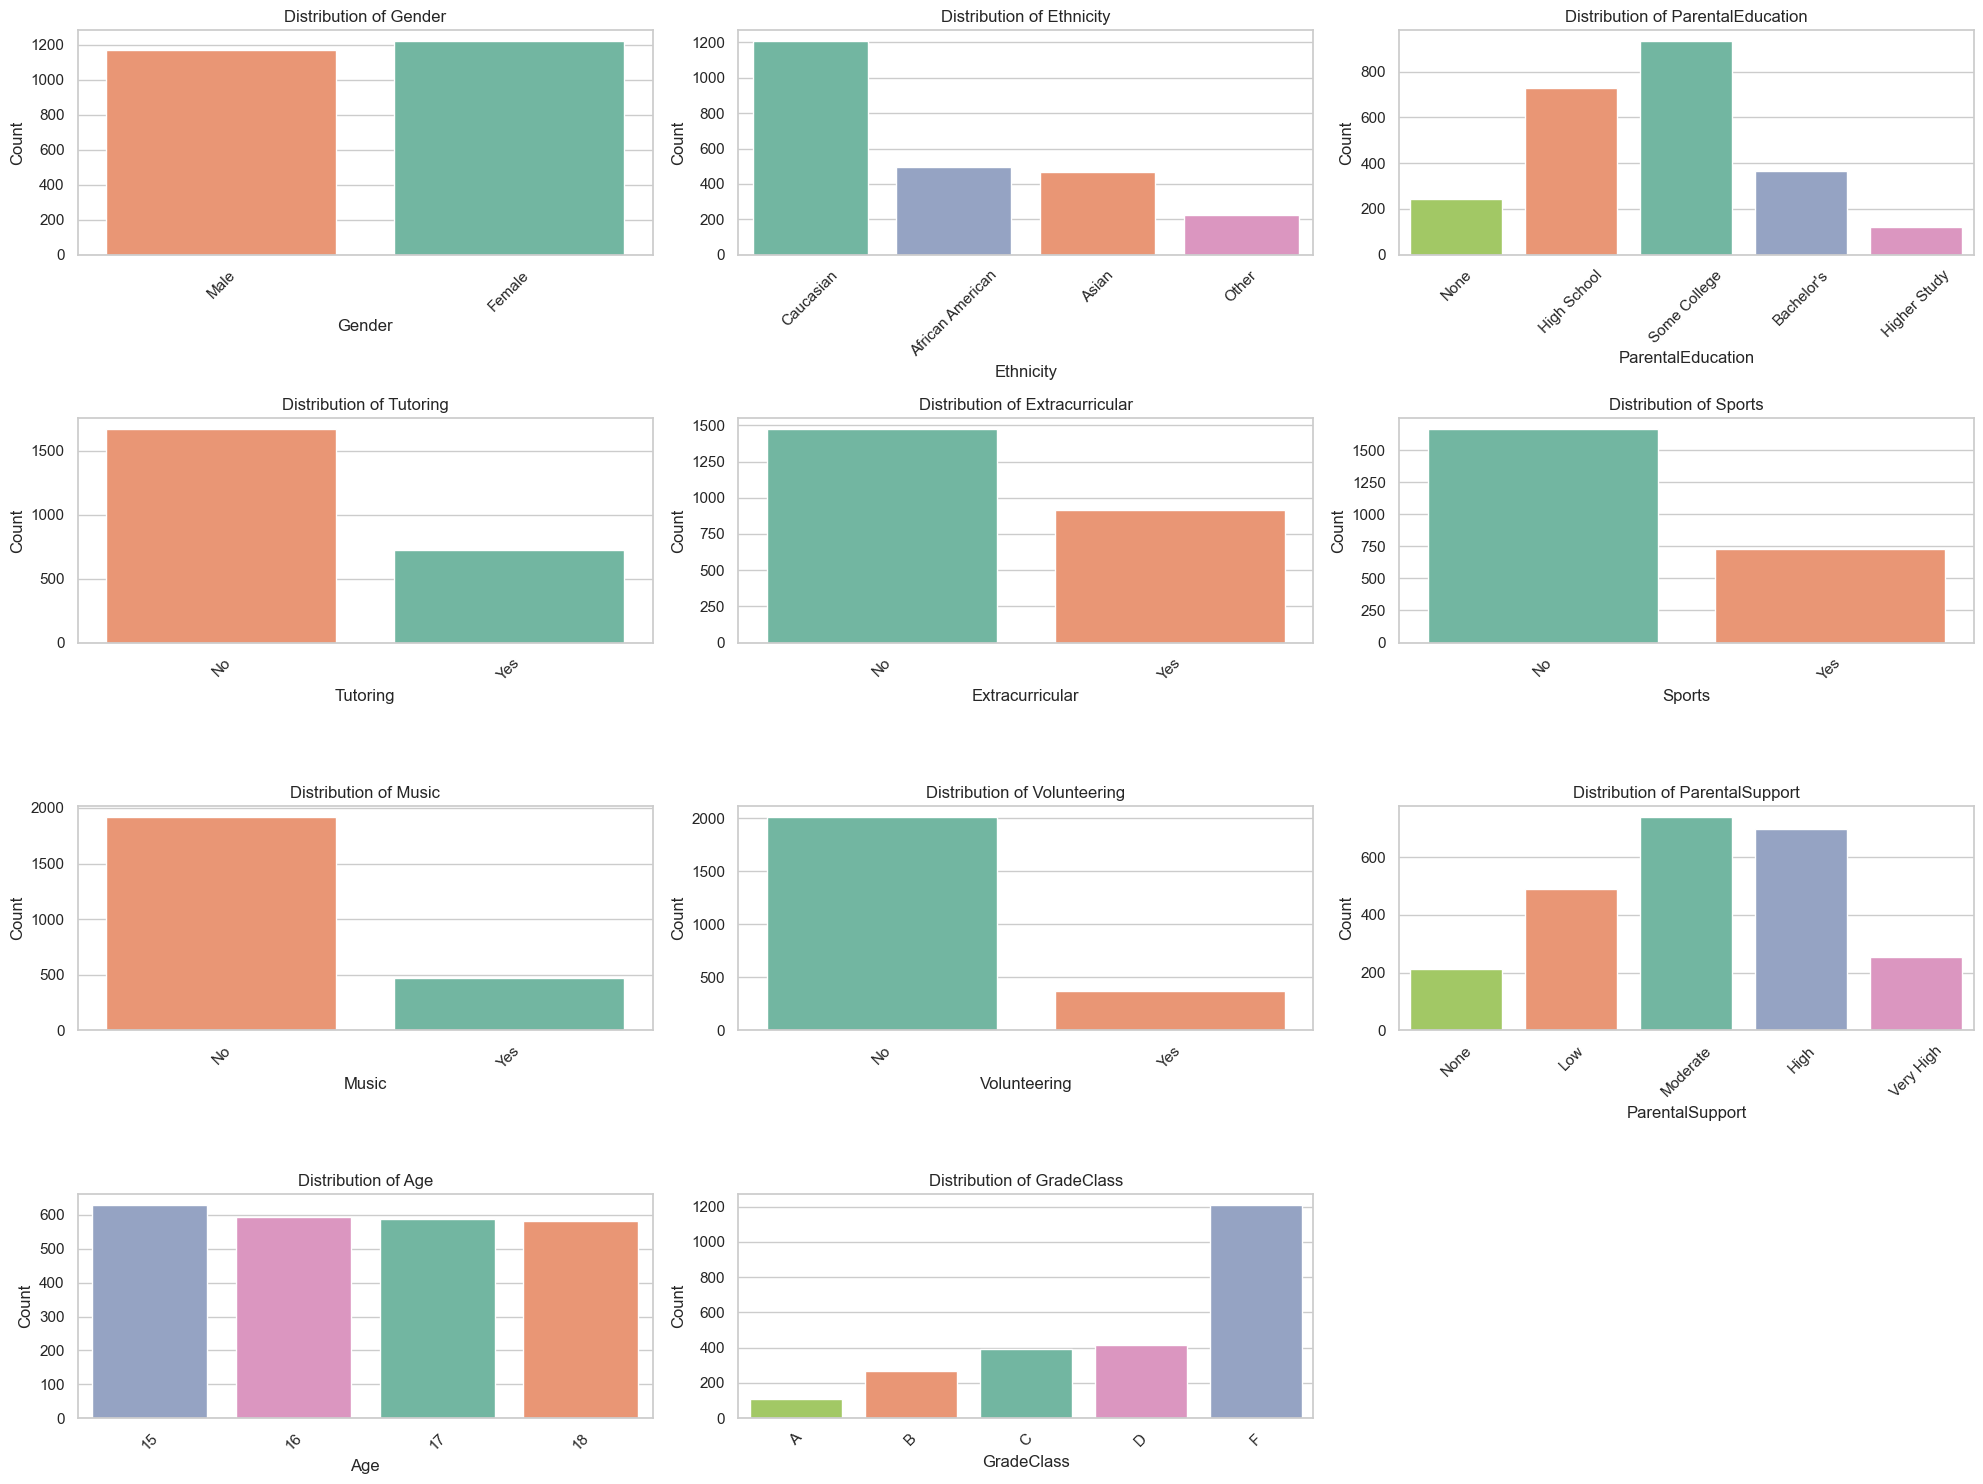

In [8]:
# Mapping and desired orders
label_maps = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {
        0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'
    },
    'ParentalEducation': {
        0: 'None', 1: 'High School', 2: 'Some College',
        3: "Bachelor's", 4: 'Higher Study'
    },
    'Tutoring': {0: 'No', 1: 'Yes'},
    'Extracurricular': {0: 'No', 1: 'Yes'},
    'Sports': {0: 'No', 1: 'Yes'},
    'Music': {0: 'No', 1: 'Yes'},
    'Volunteering': {0: 'No', 1: 'Yes'},
    'ParentalSupport': {
        0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'
    },
    'Age': {i: str(i) for i in range(15, 19)},
    'GradeClass': {0: 'A',1: 'B',2: 'C',3: 'D',4: 'F'}
}

# Custom order for each variable
category_orders = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', "Bachelor's", 'Higher Study'],
    'Tutoring': ['No', 'Yes'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'ParentalSupport': ['None', 'Low', 'Moderate', 'High', 'Very High'],
    'Age': [str(i) for i in range(15, 19)],
    'GradeClass': ['A', 'B', 'C', 'D', 'F']
}

categorical_cols = list(label_maps.keys())

# Map values
df_labeled = df.copy()
for col in categorical_cols:
    df_labeled[col] = df_labeled[col].map(label_maps[col])

# Plot with correct order
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    sns.countplot(
        data=df_labeled,
        x=col,
        hue=col,
        palette="Set2",
        legend=False,
        order=category_orders[col]
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## *ii*. Bivariate analysis

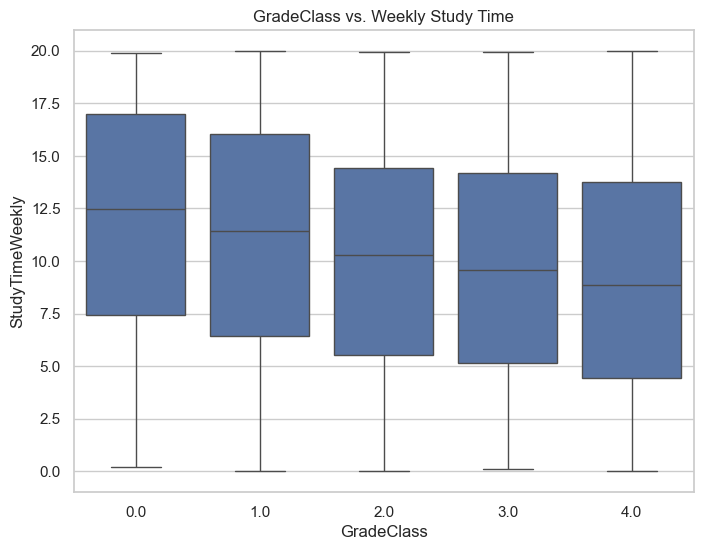

Correlation between GradeClass and StudyTimeWeekly: -0.13, p-value: 0.000


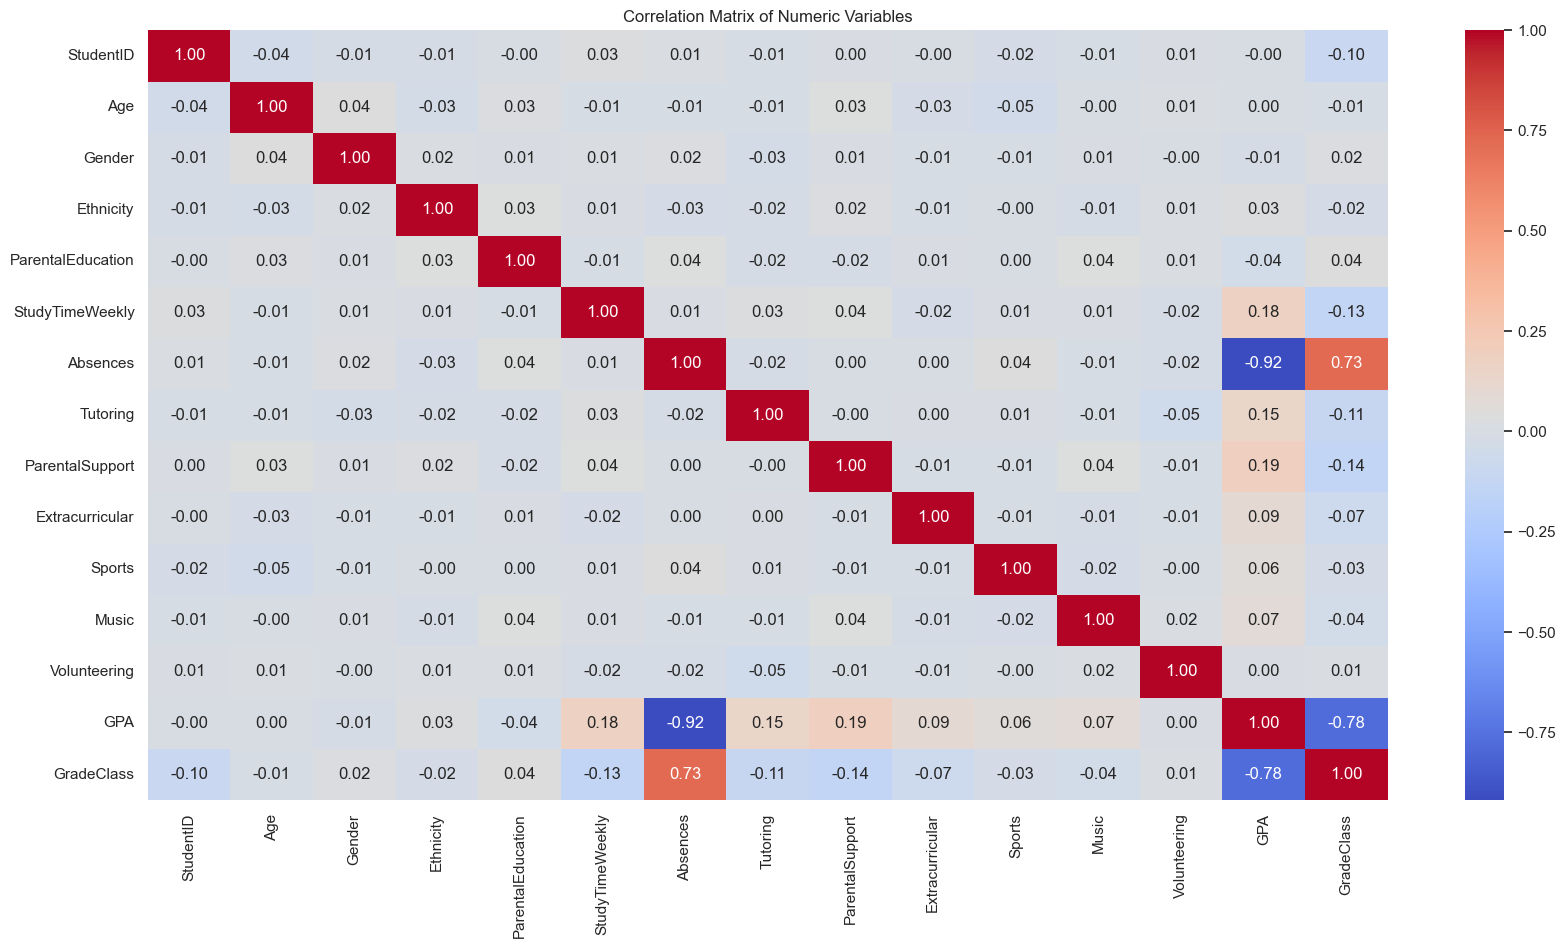

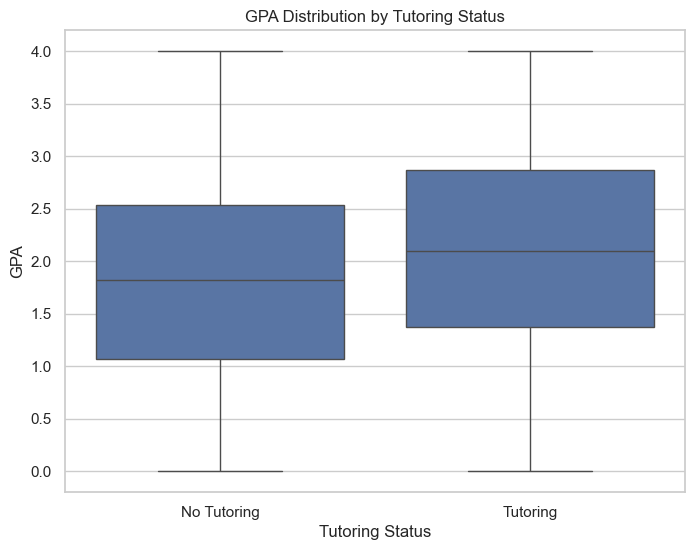


T-test for GPA by Tutoring: t-statistic=7.17, p-value=0.000


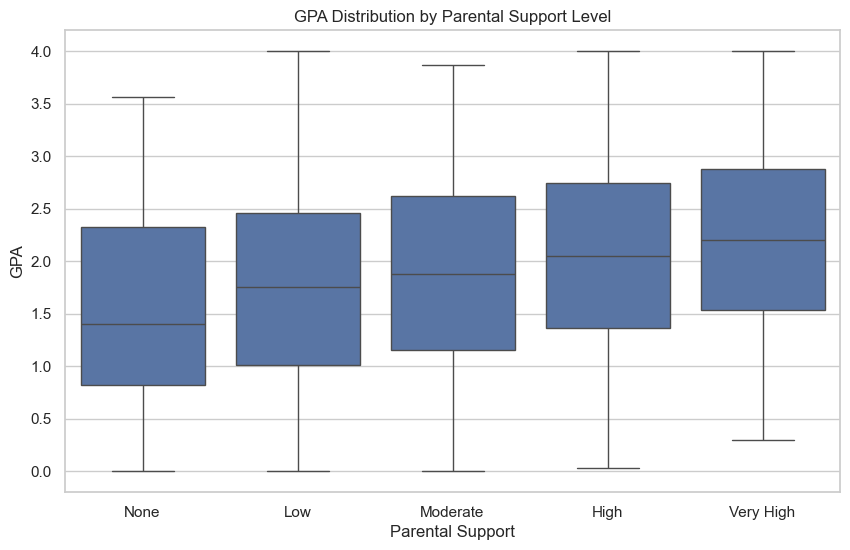


ANOVA for GPA by Parental Support: F-statistic=22.72, p-value=0.000


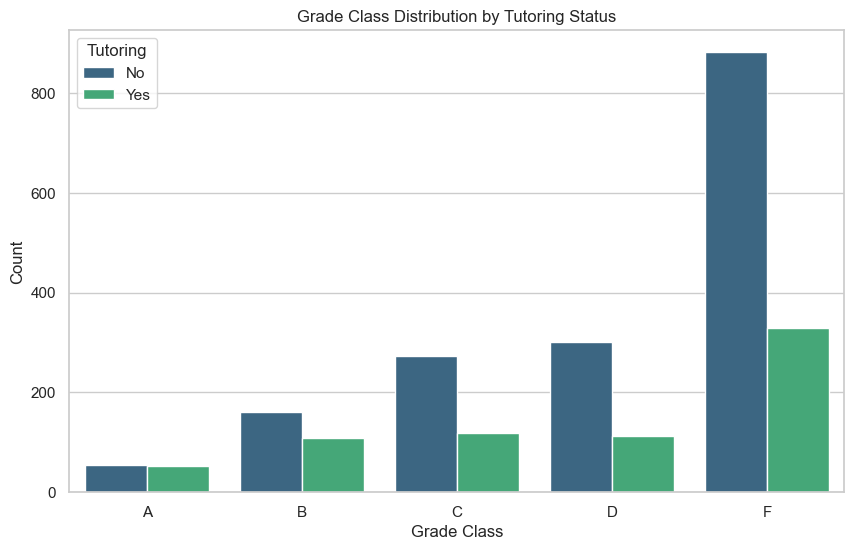

In [9]:
# Scatter plot: Grade Class vs. StudyTimeWeekly
plt.figure(figsize=(8, 6))
sns.boxplot( x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title('GradeClass vs. Weekly Study Time')
plt.show()

# Correlation:
corr, p_value = pearsonr(df['GradeClass'], df['StudyTimeWeekly'])
print(f"Correlation between GradeClass and StudyTimeWeekly: {corr:.2f}, p-value: {p_value:.3f}")

# Correlation matrix
numeric_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# --- Numeric vs. Categorical ---

# Box plot: GPA vs. Tutoring
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Tutoring', y='GPA')
# Map numeric codes to labels for clarity if desired
plt.xticks(ticks=[0, 1], labels=['No Tutoring', 'Tutoring'])
plt.title('GPA Distribution by Tutoring Status')
plt.xlabel('Tutoring Status')
plt.ylabel('GPA')
plt.show()

# T-test: GPA vs. Tutoring
gpa_tutoring_yes = df[df['Tutoring'] == 1]['GPA']
gpa_tutoring_no = df[df['Tutoring'] == 0]['GPA']
t_stat, p_val_ttest = ttest_ind(gpa_tutoring_yes, gpa_tutoring_no, nan_policy='omit')
print(f"\nT-test for GPA by Tutoring: t-statistic={t_stat:.2f}, p-value={p_val_ttest:.3f}")

# Box plot: GPA vs. ParentalSupport
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ParentalSupport', y='GPA', order=[0, 1, 2, 3, 4]) # Ensure correct order
# Map numeric codes to labels
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['None', 'Low', 'Moderate', 'High', 'Very High'])
plt.title('GPA Distribution by Parental Support Level')
plt.xlabel('Parental Support')
plt.ylabel('GPA')
plt.show()

# ANOVA: GPA vs. ParentalSupport
groups = [df['GPA'][df['ParentalSupport'] == i] for i in df['ParentalSupport'].unique()]
f_stat, p_val_anova = f_oneway(*[group.dropna() for group in groups]) # Use dropna() for safety
print(f"\nANOVA for GPA by Parental Support: F-statistic={f_stat:.2f}, p-value={p_val_anova:.3f}")


# --- Categorical vs. Categorical ---

# Count plot (Grouped Bar Chart): GradeClass vs. Tutoring
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GradeClass', hue='Tutoring', palette='viridis')
# Map numeric codes to labels
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['A', 'B', 'C', 'D', 'F'])
plt.legend(title='Tutoring', labels=['No', 'Yes'])
plt.title('Grade Class Distribution by Tutoring Status')
plt.xlabel('Grade Class')
plt.ylabel('Count')
plt.show()
